Current system is macOS
i -> 0
region_task_change -> (64,)
R = 0.07, P = 0.5813
i -> 1
region_task_change -> (64,)
R = 0.04, P = 0.7295
i -> 2
region_task_change -> (64,)
R = -0.14, P = 0.2665
i -> 3
region_task_change -> (64,)
R = 0.02, P = 0.8785
i -> 4
region_task_change -> (64,)
R = -0.02, P = 0.8556
i -> 5
region_task_change -> (64,)
R = -0.04, P = 0.7541
i -> 6
region_task_change -> (64,)
R = 0.09, P = 0.4654
fdr_correct_all_p_value -> [0.87846 0.87846 0.87846 0.87846 0.87846 0.87846 0.87846]
i -> 0
i -> 1
i -> 2
i -> 3
i -> 4
i -> 5
i -> 6


False

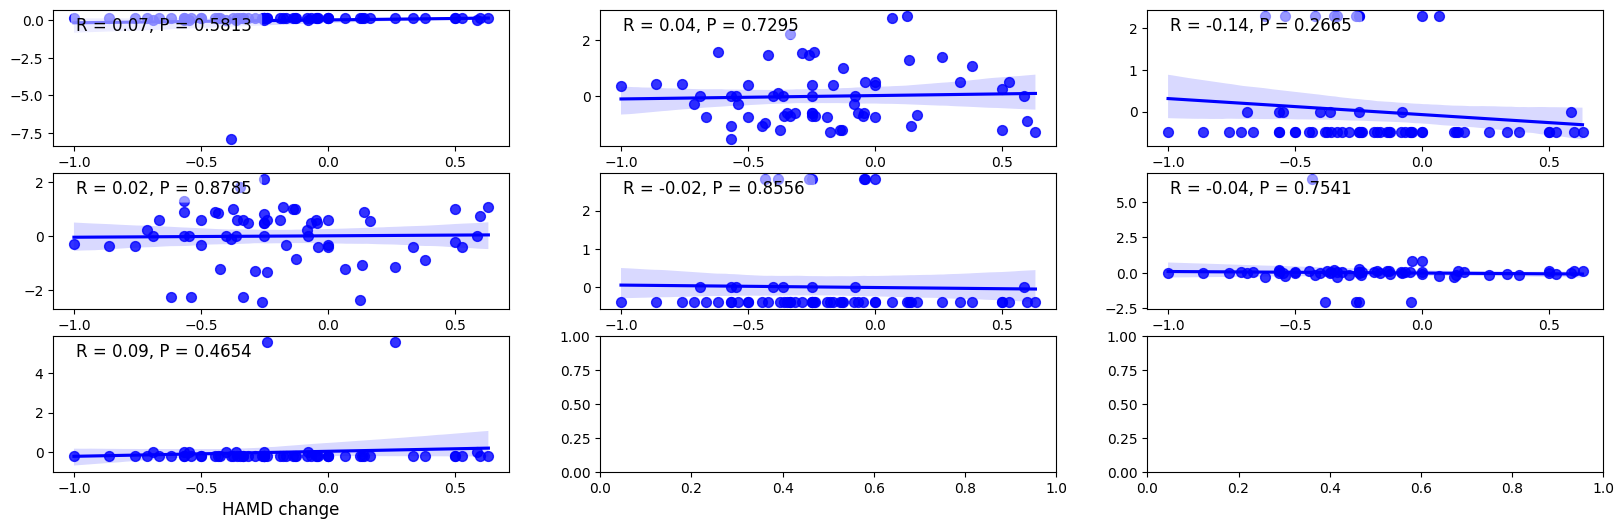

: 

In [40]:
import matplotlib.pyplot as plt

from chord import Chord
# load 
import sys
import time

from sklearn.model_selection import cross_val_score,train_test_split
from datetime import date
import numpy as np
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import pingouin as pg
import subprocess
import os 
from scipy.stats import ranksums
from scipy.stats import pearsonr
from scipy import stats
import seaborn as sns
from scipy.stats import mannwhitneyu
if sys.platform == 'darwin':
    print("Current system is macOS")
    main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
elif sys.platform == 'linux':
    print("Current system is Ubuntu")
    main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
else:
    print("Current system is neither macOS nor Ubuntu")
    
    
os.chdir(main_fold_path)


from utils.fnirs_utils import get_nine_region_data


    
# DATA =  np.load('allData/prognosis_mix_hb/pretreatment_response/hb_data.npy')
DATA = np.load('allData/prognosis_mix_hb/pretreatment_response/dose_information.npy')
LABEL =  np.load('allData/prognosis_mix_hb/pretreatment_response/label.npy')
data = DATA
label = LABEL
# data = get_nine_region_data(data)

x = np.load('allData/prognosis_mix_hb/pretreatment_response/label_hamd.npy')
reduced_percentage = (x[:, 1] - x[:, 0]) / x[:, 0]


def set_xlabel_of_ax(ax, label_name, font_size):
    if label_name == 'HAMD_change':
        ax.set_xlabel('HAMD change', fontsize=font_size)
        ax.set_xticks(np.arange(-1,1, 0.5))
        
    else:
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Nonresponders', 'Responders'], fontsize=font_size)
            
def get_five_regions_from_nine(data):
    res = np.zeros((data.shape[0], 5))
    res[:, 0] = data[:, 0] + data[:, 1]
    res[:, 1] = data[:, 2] + data[:, 3]
    res[:, 2] = data[:, 4] + data[:, 5]
    res[:, 3] = data[:, 6] + data[:, 7]
    res[:, 4] = data[:, 8]
    return res 

def plot_correlation_ax(axs, label_val, task_change_hb, label_name):
    
    all_p_value = []
    all_R = []
    all_whisker_low_high = []
    for i in range(task_change_hb.shape[-1]):
        print(f'i -> {i}')
        ax = axs[i // 3, i % 3]
        region_task_change = task_change_hb[:, i]
        print('region_task_change ->', region_task_change.shape)
        if label_name == 'HAMD_change':
            # Calculate correlation coefficient and p-value
            stat, p_value = pearsonr(label_val, region_task_change)
            
            # Create a new figure
            sns.regplot(x=label_val, y=region_task_change, ax=ax, color='blue', scatter_kws={'s': 50}, line_kws={'color': 'blue'})

            print(f"R = {stat:.2f}, P = {p_value:.4f}")
        all_p_value.append(p_value)
        all_R.append(stat)
        
        set_xlabel_of_ax(ax, label_name, font_size=12)
        # ax.set_ylabel(f"{feature_name} of {hb_type}")
        # ax.set_title(region_name[i])
    
    fdr_correct_all_p_value = multipletests(all_p_value, method='fdr_bh')[1]
    print('fdr_correct_all_p_value ->', fdr_correct_all_p_value)
    for i in range(task_change_hb.shape[-1]):
        print(f'i -> {i}')
        ax = axs[i // 3, i % 3]
        p_value = all_p_value[i]
        R = all_R[i]
        
        if label_name == 'HAMD_change':
            ax.text(0.05, 0.95, f'R = {R:.2f}, P = {p_value:.4f} ',
                transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='none', alpha=0.5), fontsize=12)
    
    for i in fdr_correct_all_p_value:
        if i < 0.05:
            return True
    return False

                
fig, axs = plt.subplots(3, 3, figsize=(20, 6))
from scripts.fusion_model.fusion_model_utils import process_with_nan_using_imputation_zscore

data = process_with_nan_using_imputation_zscore(data)
plot_correlation_ax(axs, reduced_percentage, data, 'HAMD_change')

i -> 0
region_task_change -> (64,)
R = 0.07, P = 0.5813
i -> 1
region_task_change -> (64,)
R = 0.04, P = 0.7295
i -> 2
region_task_change -> (64,)
R = -0.14, P = 0.2665
i -> 3
region_task_change -> (64,)
R = 0.02, P = 0.8785
i -> 4
region_task_change -> (64,)
R = -0.02, P = 0.8556
i -> 5
region_task_change -> (64,)
R = -0.04, P = 0.7541
i -> 6
region_task_change -> (64,)
R = 0.09, P = 0.4654
fdr_correct_all_p_value -> [0.87846 0.87846 0.87846 0.87846 0.87846 0.87846 0.87846]
i -> 0
i -> 1
i -> 2
i -> 3
i -> 4
i -> 5
i -> 6


False

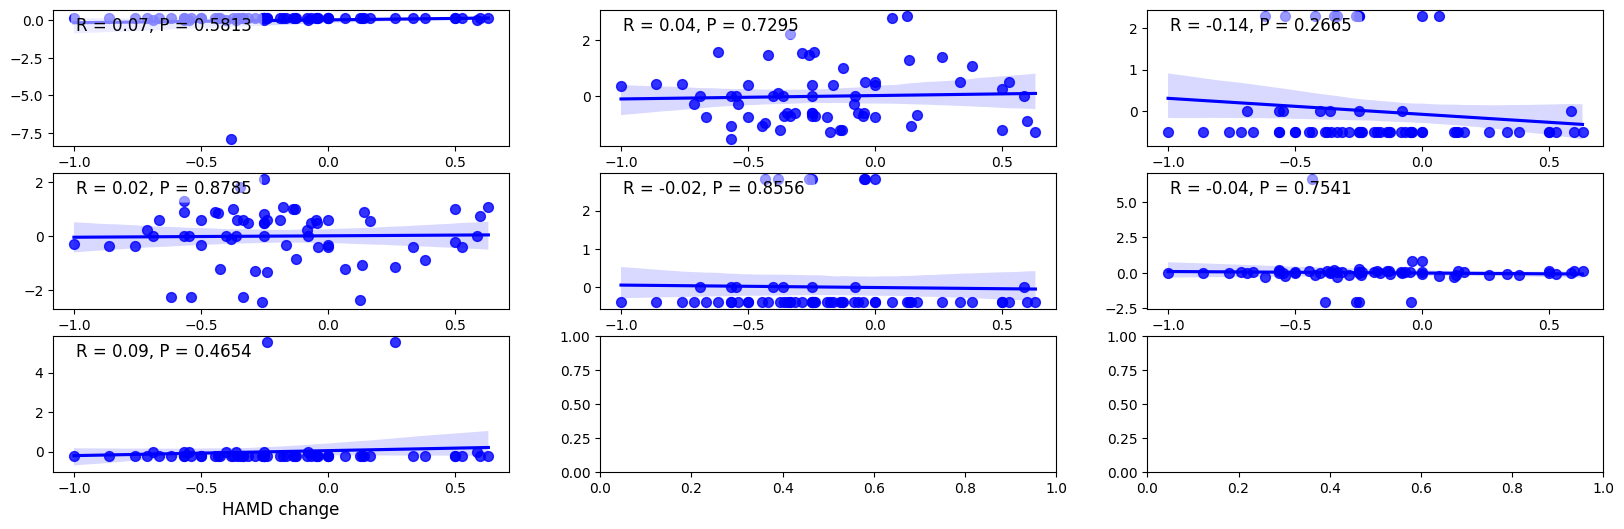